In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:28<00:00, 30.2MB/s]
100% 715M/715M [00:28<00:00, 26.5MB/s]


In [15]:
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [16]:
!apt install p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [17]:
!7za x /content/train.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 109723070 bytes (105 MiB)

Extracting archive: /content/train.7z
--
Path = /content/train.7z
Type = 7z
Physical Size = 109723070
Headers Size = 294768
Method = LZMA:26
Solid = +
Blocks = 1

  0%      2%      2% 808 - train/10725.png                            2% 1323 - train/11189.png                             2% 1700 - train/11528.png                             5% 1868 - train/1168.png                            6% 1987 - train/11787.png

In [18]:
!pip install split-folders

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping
from keras import regularizers,optimizers
from PIL import Image

In [20]:
train_label = pd.read_csv('/content/trainLabels.csv')
id_list = list(train_label['id'])
#label_num_list = train_label['label'].unique().tolist()
#print(label_num_list)

In [21]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in train_label['label']]

In [22]:
train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [23]:
X = np.array(data)
y = np.array(labels)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
# Layer 1
basic_cnn = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),  # Corrected line
    layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
basic_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

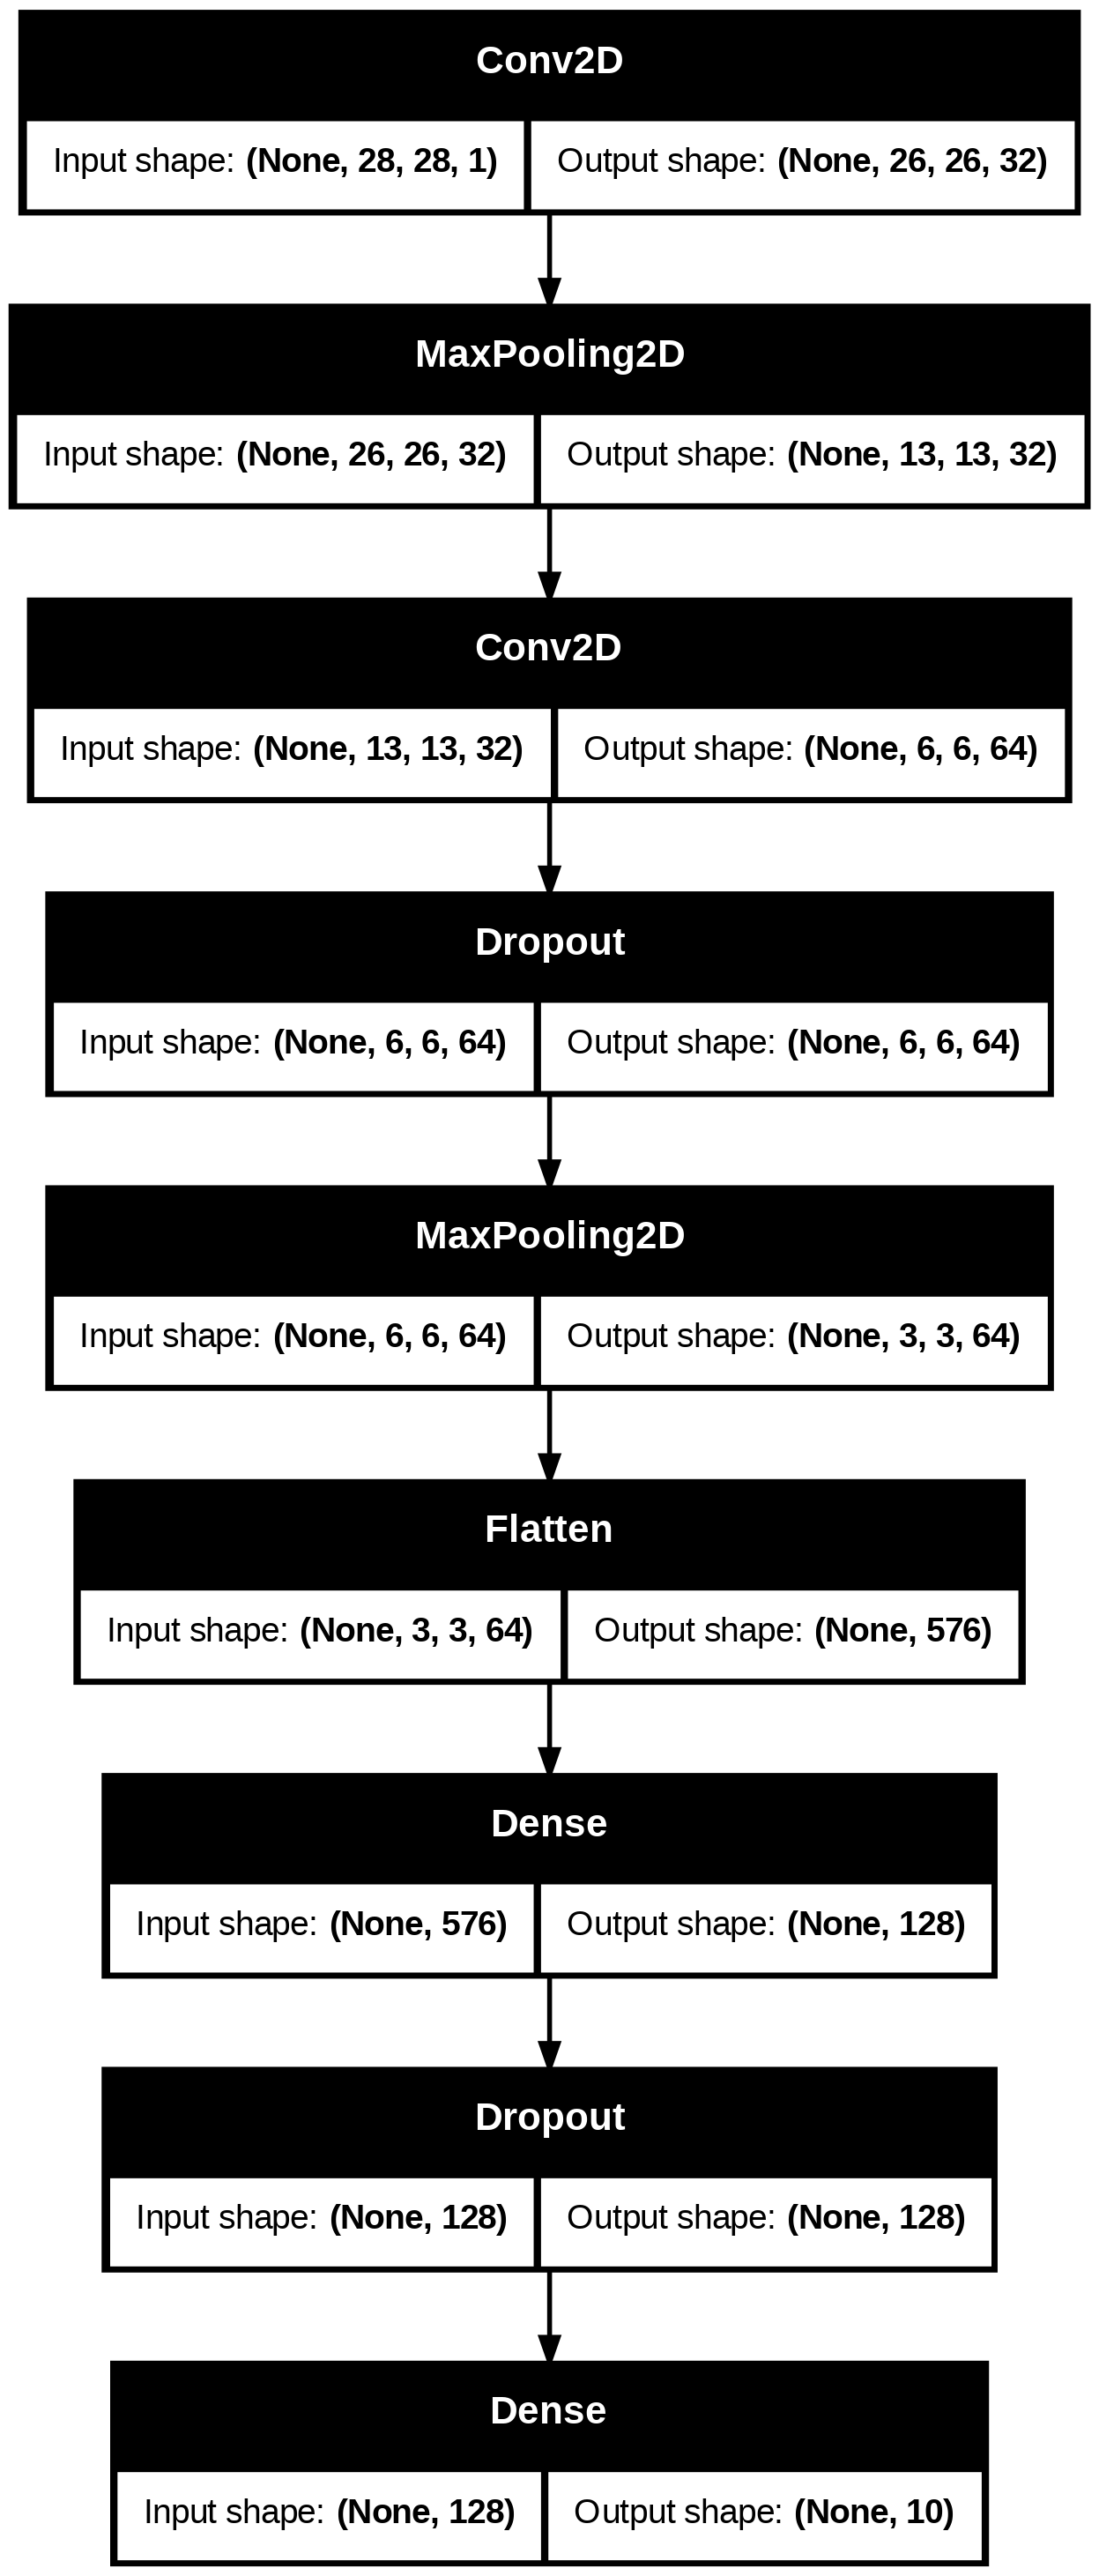

In [ ]:
tf.keras.utils.plot_model(basic_cnn, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
early_stopping_callback = callbacks.EarlyStopping(patience=10)

batch_size = X_train.shape[0]//20



basic_cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs_info = basic_cnn.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=20,
                            callbacks=[early_stopping_callback],
                            validation_split=0.15)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.1136 - loss: 44.8653 - val_accuracy: 0.1678 - val_loss: 2.2885
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1283 - loss: 2.9758 - val_accuracy: 0.1550 - val_loss: 2.2660
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1297 - loss: 2.4472 - val_accuracy: 0.1900 - val_loss: 2.2284
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1521 - loss: 2.3229 - val_accuracy: 0.2045 - val_loss: 2.1910
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1658 - loss: 2.2183 - val_accuracy: 0.2198 - val_loss: 2.1515
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1827 - loss: 2.1683 - val_accuracy: 0.2553 - val_loss: 2.1171
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.1997 - loss: 2.1280 - val_accuracy: 0.2800 - val_loss: 2.0643
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.2167 - loss: 2.0867 - val_accuracy: 0.2953 - val_loss

In [ ]:
basic_cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4068 - loss: 1.7625


[1.7535614967346191, 0.41040000319480896]

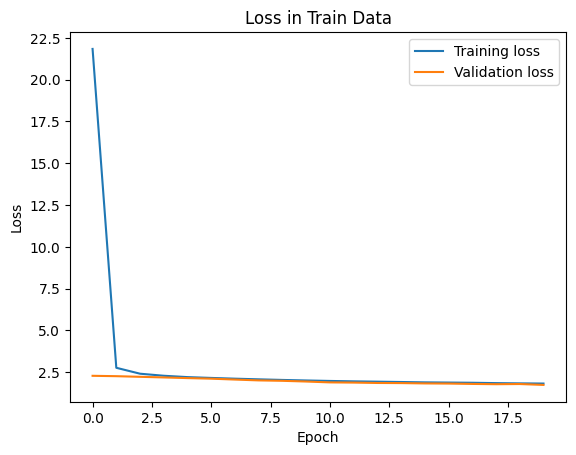

In [ ]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Loss in Train Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

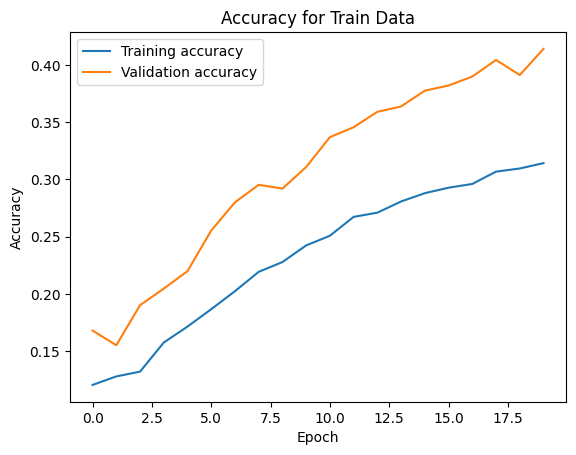

In [ ]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("Accuracy for Train Data")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


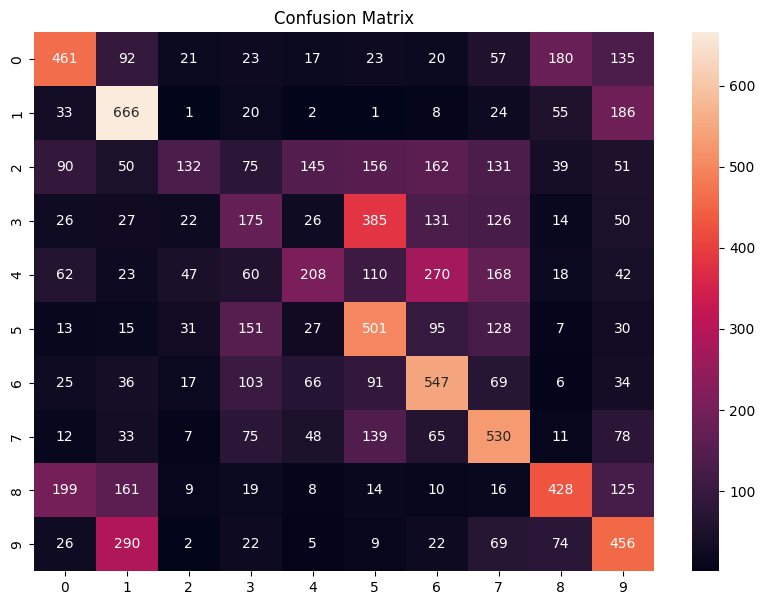

In [ ]:
y_pred = basic_cnn.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_names = ["0 -> airplane",
               "1 -> automobile",
               "2 -> bird",
               "3 -> cat",
               "4 -> deer",
               "5 -> dog",
               "6 -> frog",
               "7 -> horse",
               "8 -> ship",
               "9 -> truck"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                 precision    recall  f1-score   support

  0 -> airplane       0.49      0.45      0.47      1029
1 -> automobile       0.48      0.67      0.56       996
      2 -> bird       0.46      0.13      0.20      1031
       3 -> cat       0.24      0.18      0.21       982
      4 -> deer       0.38      0.21      0.27      1008
       5 -> dog       0.35      0.50      0.41       998
      6 -> frog       0.41      0.55      0.47       994
     7 -> horse       0.40      0.53      0.46       998
      8 -> ship       0.51      0.43      0.47       989
     9 -> truck       0.38      0.47      0.42       975

       accuracy                           0.41     10000
      macro avg       0.41      0.41      0.39     10000
   weighted avg       0.41      0.41      0.39     10000



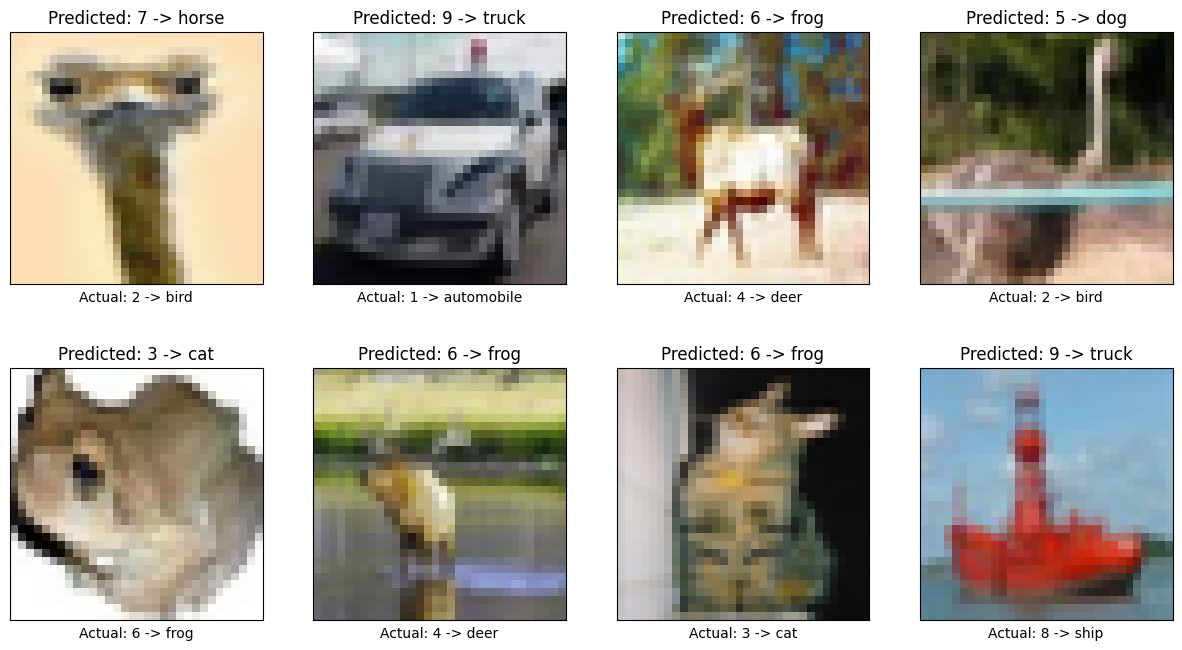

In [ ]:
incorrect = np.nonzero(y_pred_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect], cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))

## **VGG MODEL**

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, Dropout, Input
from keras.optimizers import Adam
# Define the VGG-like model
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Model
from keras.applications.vgg16 import VGG16

def vgg_model(num_of_classes) :
    vgg_1 = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),  # Input size is now 32x32x3
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Output: 16x16x32

    # Second convolutional block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Output: 8x8x64

    # Third convolutional block
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Output: 4x4x128

    # Flatten and Fully Connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # For 10-class classification
    ])

    return vgg_1


model = vgg_model(10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,341,226 (5.12 MB)

 Trainable params: 1,341,226 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
early_stopping_callback = callbacks.EarlyStopping(patience=10)

batch_size = X_train.shape[0]//20



model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs_info = model.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=20,
                            callbacks=[early_stopping_callback],
                            validation_split=0.15)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 477ms/step - accuracy: 0.1204 - loss: 9.7071 - val_accuracy: 0.2580 - val_loss: 2.0604
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.2422 - loss: 2.0439 - val_accuracy: 0.3925 - val_loss: 1.7307
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.3753 - loss: 1.7283 - val_accuracy: 0.4465 - val_loss: 1.5320
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.4218 - loss: 1.6033 - val_accuracy: 0.4833 - val_loss: 1.4300
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.4721 - loss: 1.4658 - val_accuracy: 0.4798 - val_loss: 1.4507
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.4805 - loss: 1.4349 - val_accuracy: 0.5323 - val_loss: 1.3062
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.5337 - loss: 1.3118 - val_accuracy: 0.5422 - val_loss: 1.2677
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.5551 - loss: 1.2560 - val_accuracy: 0

In [35]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6643 - loss: 0.9644


[0.9513102769851685, 0.669700026512146]

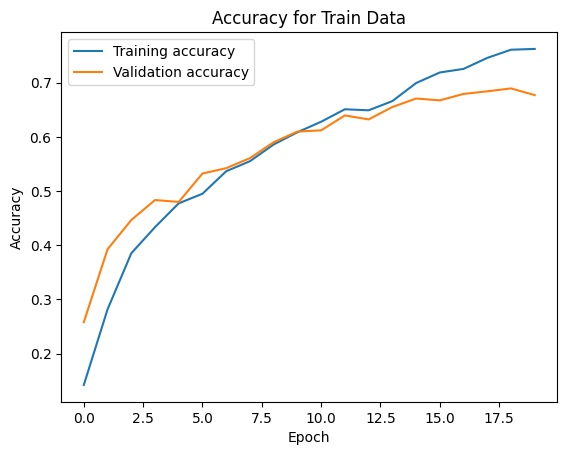

In [36]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("Accuracy for Train Data")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

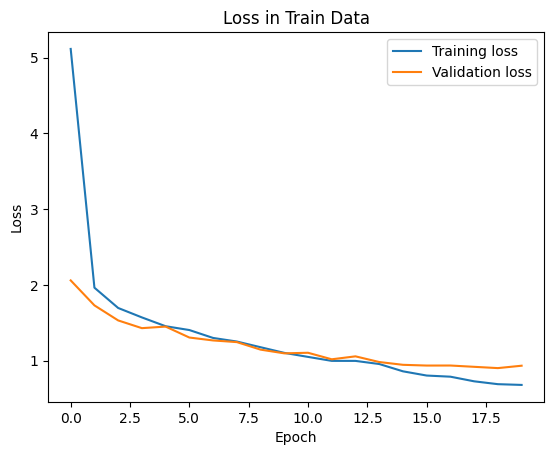

In [37]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Loss in Train Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


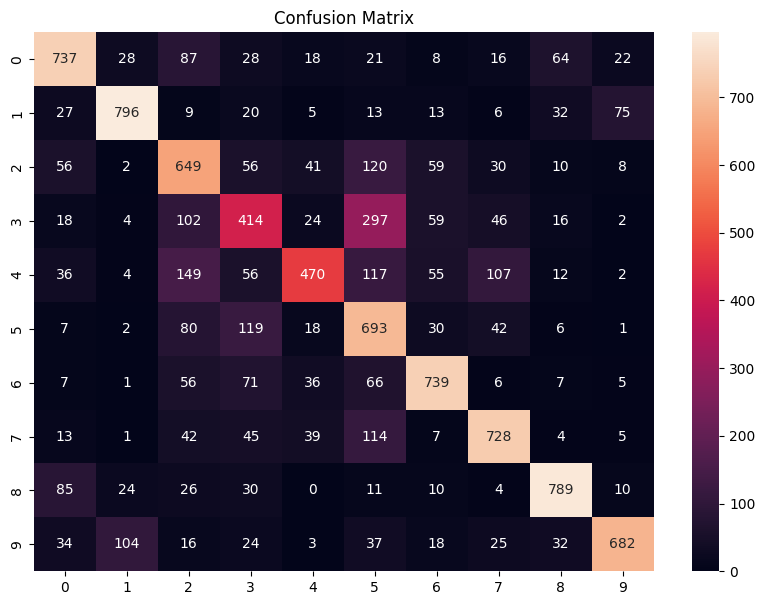

In [39]:
y_pred = model.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [40]:
class_names = ["0 -> airplane",
               "1 -> automobile",
               "2 -> bird",
               "3 -> cat",
               "4 -> deer",
               "5 -> dog",
               "6 -> frog",
               "7 -> horse",
               "8 -> ship",
               "9 -> truck"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                 precision    recall  f1-score   support

  0 -> airplane       0.72      0.72      0.72      1029
1 -> automobile       0.82      0.80      0.81       996
      2 -> bird       0.53      0.63      0.58      1031
       3 -> cat       0.48      0.42      0.45       982
      4 -> deer       0.72      0.47      0.57      1008
       5 -> dog       0.47      0.69      0.56       998
      6 -> frog       0.74      0.74      0.74       994
     7 -> horse       0.72      0.73      0.73       998
      8 -> ship       0.81      0.80      0.80       989
     9 -> truck       0.84      0.70      0.76       975

       accuracy                           0.67     10000
      macro avg       0.69      0.67      0.67     10000
   weighted avg       0.69      0.67      0.67     10000



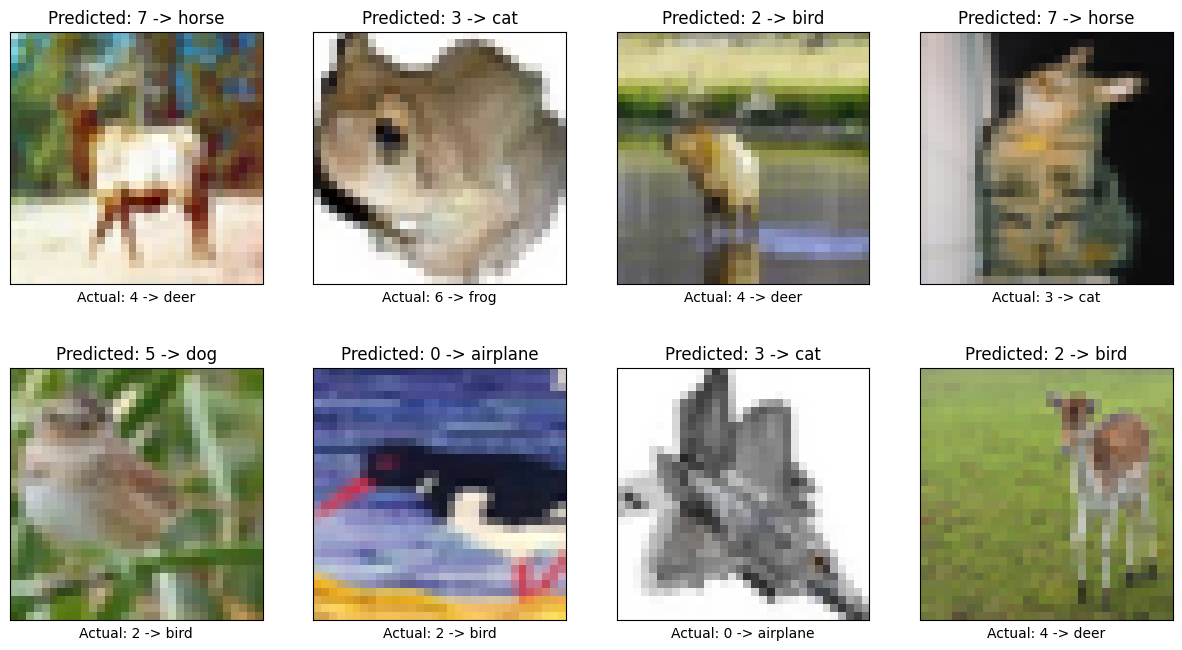

In [45]:
incorrect = np.nonzero(y_pred_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect], cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))